# Superstore Giant
___
___

### Sobre o dataset utilizado

Com demandas crescentes e competições acirradas no mercado, a Superstore Giant está buscando seu conhecimento para entender o que funciona melhor para ela. Eles gostariam de entender quais produtos, regiões, categorias e segmentos de clientes eles devem segmentar ou evitar.

Disponível em: https://www.kaggle.com/datasets/vivek468/superstore-dataset-final?resource=download

### Sobre as colunas do dataset

    Row ID         ->  ID exclusivo para cada linha  
    Order ID       ->  ID do pedido exclusivo para cada cliente  
    Order Date     ->  Data do pedido do produto  
    Ship Date      ->  Data de envio do produto  
    Ship Mode      ->  Modo de envio especificado pelo cliente  
    Customer ID    ->  ID exclusivo para identificar cada cliente  
    Customer Name  ->  Nome do cliente  
    Segment        ->  O segmento ao qual o cliente pertence  
    Country        ->  País de residência do cliente  
    City           ->  Cidade de residência do cliente  
    State          ->  Estado de residência do cliente  
    Postal Code    ->  Código postal de cada cliente  
    Region         ->  Região onde o cliente pertence  
    Product ID     ->  ID exclusivo do produto  
    Category       ->  Categoria do produto encomendado  
    Sub-Category   ->  Subcategoria do produto encomendado  
    Product Name   ->  Nome do produto  
    Sales          ->  Vendas do produto  
    Quantity       ->  Quantidade do produto  
    Discount       ->  Desconto fornecido  
    Profit         ->  Lucro/perda incorrido  

## Bibliotecas utilizadas
___

In [1]:
# Importações
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Configurações
%matplotlib inline
pd.set_option('display.max_columns', None)
sns.set_theme(style='darkgrid', palette='mako', font_scale=1.1)

## Importação e tratamento dos dados
___

###### Importar csv e colocá-lo como DataFrame

In [2]:
data = pd.read_csv('dataset/Sample - Superstore.csv', encoding='windows-1252')
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


###### Informações iniciais sobre o dataset

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

###### Descrições iniciais sobre o dataset

In [4]:
data.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


###### Excluir colunas que não vão ser utilizadas

In [5]:
data.drop(['Row ID'], axis=1, inplace=True)

###### Alterar nome das colunas do dataset

In [6]:
data.columns = [x.replace(' ', '_').lower() for x in data.columns]
data.columns

Index(['order_id', 'order_date', 'ship_date', 'ship_mode', 'customer_id',
       'customer_name', 'segment', 'country', 'city', 'state', 'postal_code',
       'region', 'product_id', 'category', 'sub-category', 'product_name',
       'sales', 'quantity', 'discount', 'profit'],
      dtype='object')

###### Mudar formato das datas

In [7]:
data['order_date'] = pd.to_datetime(data['order_date'], format='%m/%d/%Y')
data['ship_date'] = pd.to_datetime(data['ship_date'], format='%m/%d/%Y')

###### Verificar dados nulos

In [8]:
data.isnull().sum()

order_id         0
order_date       0
ship_date        0
ship_mode        0
customer_id      0
customer_name    0
segment          0
country          0
city             0
state            0
postal_code      0
region           0
product_id       0
category         0
sub-category     0
product_name     0
sales            0
quantity         0
discount         0
profit           0
dtype: int64

Não há dados faltantes na base de dados

## Visualização dos dados 
_________________________________________

### Informações básicas


##### Países

In [9]:
data['country'].value_counts()

United States    9994
Name: country, dtype: int64

Todas as vendas que estão na base de dados foram feitas nos Estados Unidos, então essa coluna pode ser excluída.

In [10]:
data.drop(['country'], axis=1, inplace=True)

##### Estados

In [11]:
data['state'].unique()

array(['Kentucky', 'California', 'Florida', 'North Carolina',
       'Washington', 'Texas', 'Wisconsin', 'Utah', 'Nebraska',
       'Pennsylvania', 'Illinois', 'Minnesota', 'Michigan', 'Delaware',
       'Indiana', 'New York', 'Arizona', 'Virginia', 'Tennessee',
       'Alabama', 'South Carolina', 'Oregon', 'Colorado', 'Iowa', 'Ohio',
       'Missouri', 'Oklahoma', 'New Mexico', 'Louisiana', 'Connecticut',
       'New Jersey', 'Massachusetts', 'Georgia', 'Nevada', 'Rhode Island',
       'Mississippi', 'Arkansas', 'Montana', 'New Hampshire', 'Maryland',
       'District of Columbia', 'Kansas', 'Vermont', 'Maine',
       'South Dakota', 'Idaho', 'North Dakota', 'Wyoming',
       'West Virginia'], dtype=object)

##### Cidades

In [12]:
data['city'].unique()

array(['Henderson', 'Los Angeles', 'Fort Lauderdale', 'Concord',
       'Seattle', 'Fort Worth', 'Madison', 'West Jordan', 'San Francisco',
       'Fremont', 'Philadelphia', 'Orem', 'Houston', 'Richardson',
       'Naperville', 'Melbourne', 'Eagan', 'Westland', 'Dover',
       'New Albany', 'New York City', 'Troy', 'Chicago', 'Gilbert',
       'Springfield', 'Jackson', 'Memphis', 'Decatur', 'Durham',
       'Columbia', 'Rochester', 'Minneapolis', 'Portland', 'Saint Paul',
       'Aurora', 'Charlotte', 'Orland Park', 'Urbandale', 'Columbus',
       'Bristol', 'Wilmington', 'Bloomington', 'Phoenix', 'Roseville',
       'Independence', 'Pasadena', 'Newark', 'Franklin', 'Scottsdale',
       'San Jose', 'Edmond', 'Carlsbad', 'San Antonio', 'Monroe',
       'Fairfield', 'Grand Prairie', 'Redlands', 'Hamilton', 'Westfield',
       'Akron', 'Denver', 'Dallas', 'Whittier', 'Saginaw', 'Medina',
       'Dublin', 'Detroit', 'Tampa', 'Santa Clara', 'Lakeville',
       'San Diego', 'Brentwood', 'Cha

##### Quantos produtos diferentes a base de dados possui?

In [13]:
len(data['product_id'].unique())

1862

##### Quais categorias de produtos  e quantos produtos de cada uma existem na base de dados? 

In [14]:
data['category'].value_counts()

Office Supplies    6026
Furniture          2121
Technology         1847
Name: category, dtype: int64

##### Quais sub-categorias de produtos e  quantos produtos de cada uma existem na base de dados? 

In [15]:
data['sub-category'].value_counts()

Binders        1523
Paper          1370
Furnishings     957
Phones          889
Storage         846
Art             796
Accessories     775
Chairs          617
Appliances      466
Labels          364
Tables          319
Envelopes       254
Bookcases       228
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: sub-category, dtype: int64

##### Quantidade de itens vendidos no período analisado

In [16]:
data['quantity'].sum()

37873

##### Total em vendas no período analisado

In [17]:
data['sales'].sum()

2297200.8603000003

##### Lucro total no período analisado

In [18]:
data['profit'].sum()

286397.0217

### Informações gerais

##### Lucro total em relação a cada característica

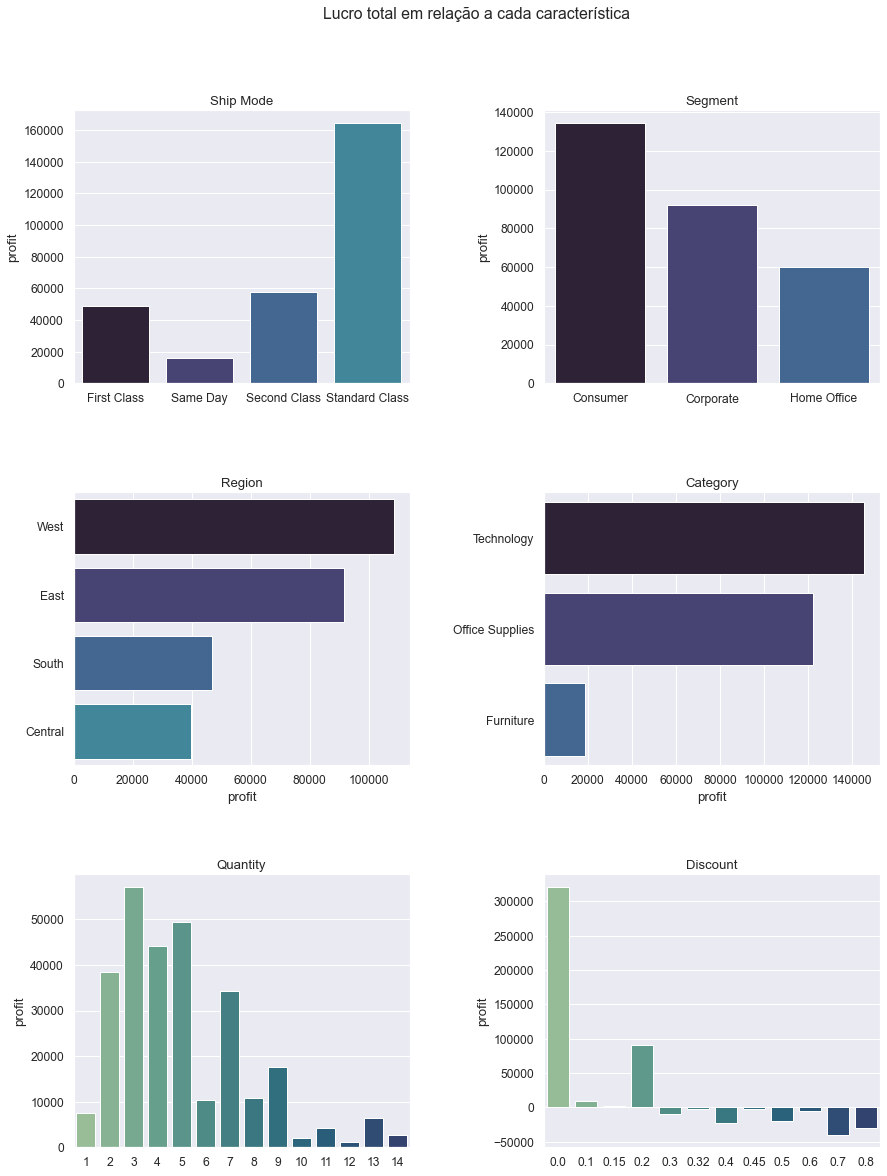

In [19]:
fig, axes = plt.subplots(3, 2, figsize=(14, 18))
fig.suptitle('Lucro total em relação a cada característica')

# Ship Mode
query = data.groupby('ship_mode')["profit"].sum()
sns.barplot(ax=axes[0, 0], x=query.index, y=query).set(title='Ship Mode', xlabel='')

# Segment
query = data.groupby('segment')["profit"].sum()
sns.barplot(ax=axes[0, 1], x=query.index, y=query).set(title='Segment', xlabel='')

# Region
query = data.groupby('region')["profit"].sum().sort_values(ascending=False)
sns.barplot(ax=axes[1, 0], y=query.index, x=query).set(title='Region', ylabel='')

# Category
query = data.groupby('category')["profit"].sum().sort_values(ascending=False)
sns.barplot(ax=axes[1, 1], y=query.index, x=query).set(title='Category', ylabel='')

# Quantity
query = data.groupby('quantity')["profit"].sum()
sns.barplot(ax=axes[2, 0], x=query.index, y=query, palette='crest').set(title='Quantity', xlabel='')

# Discount
query = data.groupby('discount')["profit"].sum()
sns.barplot(ax=axes[2, 1], x=query.index, y=query, palette='crest').set(title='Discount', xlabel='')

plt.subplots_adjust(left=0.1, 
                    bottom=0.1,  
                    right=0.9,  
                    top=0.9,  
                    wspace=0.4,  
                    hspace=0.4)

##### Média de lucro em relação a cada característica

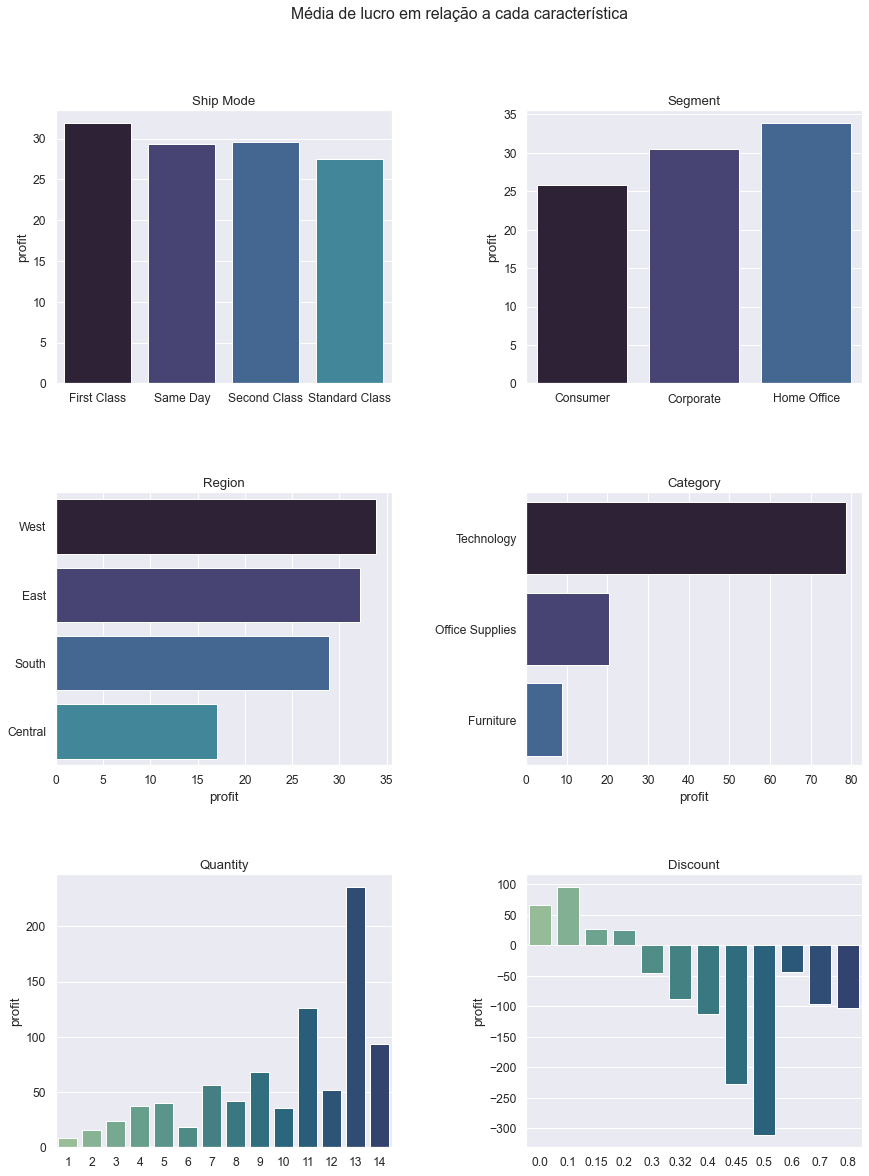

In [20]:
fig, axes = plt.subplots(3, 2, figsize=(14, 18))
fig.suptitle('Média de lucro em relação a cada característica')

# Ship Mode
query = data.groupby('ship_mode')["profit"].mean()
sns.barplot(ax=axes[0, 0], x=query.index, y=query).set(title='Ship Mode', xlabel='')

# Segment
query = data.groupby('segment')["profit"].mean()
sns.barplot(ax=axes[0, 1], x=query.index, y=query).set(title='Segment', xlabel='')

# Region
query = data.groupby('region')["profit"].mean().sort_values(ascending=False)
sns.barplot(ax=axes[1, 0], y=query.index, x=query).set(title='Region', ylabel='')

# Category
query = data.groupby('category')["profit"].mean().sort_values(ascending=False)
sns.barplot(ax=axes[1, 1], y=query.index, x=query).set(title='Category', ylabel='')

# Quantity
query = data.groupby('quantity')["profit"].mean()
sns.barplot(ax=axes[2, 0], x=query.index, y=query, palette='crest').set(title='Quantity', xlabel='')

# Discount
query = data.groupby('discount')["profit"].mean()
sns.barplot(ax=axes[2, 1], x=query.index, y=query, palette='crest').set(title='Discount', xlabel='')

plt.subplots_adjust(left=0.1, 
                    bottom=0.1,  
                    right=0.9,  
                    top=0.9,  
                    wspace=0.4,  
                    hspace=0.4)


###### Levando em conta uma análise mais superficial, temos que:

* Ship Mode: A média de lucro entre os modos de envio possuem leve diferença, porém em relação ao lucro total, temos que 'Standard Class' gera bem mais lucro que os outros modos de envio, enquanto 'Same Day' gera menos lucro.
* Segment: 'Home Office' gera maior lucro médio dentre os segmentos, porém possui menos lucro total em relação aos outros. Enquanto isso 'Consumer' é o segmento com menos lucro médio, porém com maior lucro total.
* Region: 'West' e 'East' são as regiões em que o lucro total e o lucro médio são melhores.
* Category: O lucro total e médio em 'Technology' é muito superior em relação às outras categorias. 'Furniture' é a que menos gera lucro em geral.
* Quantity: Em relação à quantidade, temos que compras com menos quantidades são mais comuns, então acabam gerando mais lucro total. Inverso à isso, conforme se cresce a quantidade, o lucro médio tende a aumentar.
* Discount: Compras sem desconto tendem a dar mais lucro total, devido ao fato de que não prejudica o preço do produto. Análogo a isso, compras com 0% de desconto a 10% de desconto tendem a dar mais lucro médio, pois acima disso o lucro sobre o produto vai ficando cada vez mais baixo, podendo gerar até prejuízos.


##### Top 10 cidades que geraram mais lucro

<AxesSubplot:xlabel='city', ylabel='profit'>

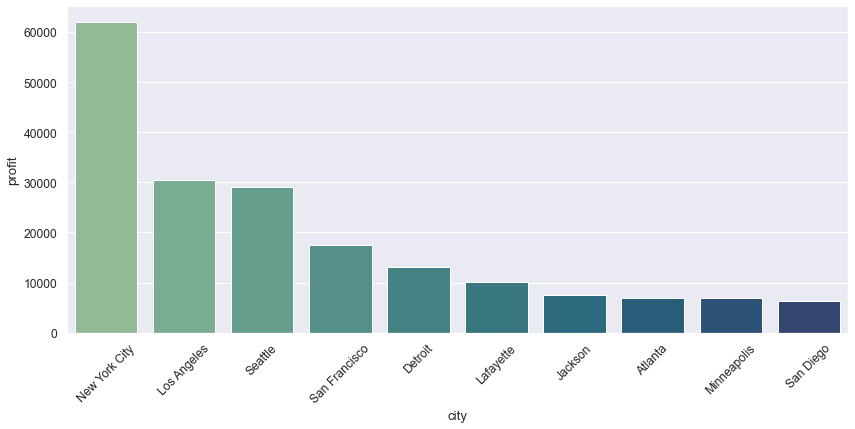

In [21]:
# Query
query = data.groupby(['city'])['profit'].sum().sort_values(ascending=False).head(10)

# Gráfico
plt.figure(figsize=(14, 6))
plt.xticks(rotation=45)
sns.barplot(x=query.index, y=query, palette='crest')

##### Top 10 cidades que deram menos lucro ou prejuízo

<AxesSubplot:xlabel='city', ylabel='profit'>

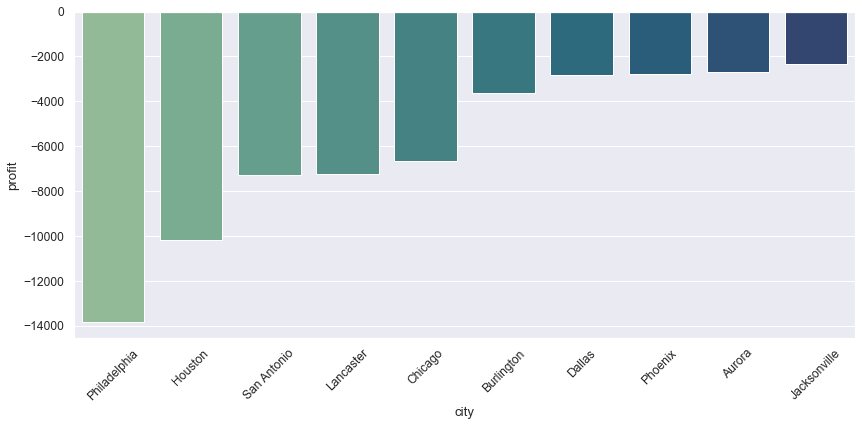

In [22]:
# Query
query = data.groupby(['city'])['profit'].sum().sort_values(ascending=True).head(10)

# Gráfico
plt.figure(figsize=(14, 6))
plt.xticks(rotation=45)
sns.barplot(x=query.index, y=query, palette='crest')

##### Top 10 produtos que geraram mais lucro

<AxesSubplot:xlabel='product_id', ylabel='profit'>

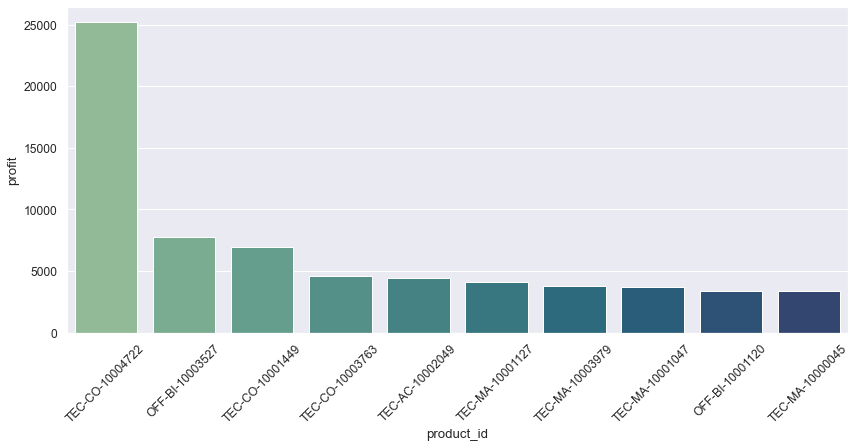

In [23]:
# Query
query = data.groupby(['product_id'])['profit'].sum().sort_values(ascending=False).head(10)

# Nome do produto que gerou mais lucro
best_seller_id = query.index[0]
best_seller = data[data['product_id']==best_seller_id]['product_name'].iloc[0]

# Gráfico
plt.figure(figsize=(14, 6))
plt.xticks(rotation=45)
sns.barplot(x=query.index, y=query, palette='crest')

In [24]:
best_seller

'Canon imageCLASS 2200 Advanced Copier'

Temos que o produto 'Canon imageCLASS 2200 Advanced Copier' é o que possui mais lucro dentre todos os produtos, com uma grande discrepância em relação aos outros produtos.

##### Top 10 produtos que geraram mais prejuízo

<AxesSubplot:xlabel='product_id', ylabel='profit'>

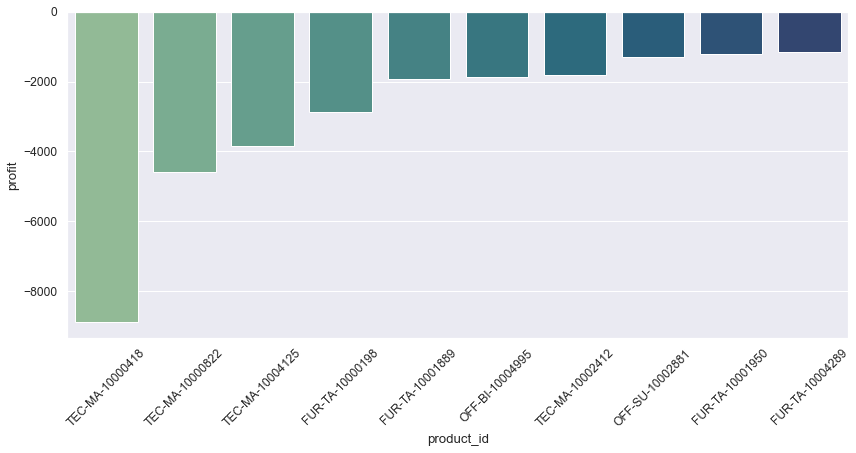

In [25]:
# Query
query = data.groupby(['product_id'])['profit'].sum().sort_values(ascending=True).head(10)

# Nome do produto que gerou mais prejuízo
worst_seller_id = query.index[0]
worst_seller = data[data['product_id']==worst_seller_id]['product_name'].iloc[0]

# Gráfico
plt.figure(figsize=(14, 6))
plt.xticks(rotation=45)
sns.barplot(x=query.index, y=query, palette='crest')

In [26]:
worst_seller

'Cubify CubeX 3D Printer Double Head Print'

Temos que o produto 'Cubify CubeX 3D Printer Double Head Print' é o que possui mais prejuízo dentre todos os produtos, com uma grande discrepância em relação aos outros produtos.

### Análise sobre o item que gerou mais lucro

In [27]:
# Quantidade de vendas por região
query = data[['region', 'product_id', 'sales', 'profit']]
query = query[query['product_id']==best_seller_id]
query

,region,product_id,sales,profit
2623,East,TEC-CO-10004722,11199.968,3919.9888
4190,East,TEC-CO-10004722,10499.970,5039.9856
6425,East,TEC-CO-10004722,8399.976,1119.9968
6826,Central,TEC-CO-10004722,17499.950,8399.9760
8153,West,TEC-CO-10004722,13999.960,6719.9808


Houveram cinco vendas do produto que gerou mais lucro, todas com um bom lucro, nenhuma com prejuízo. Pode-se pensar na possibilidade de criar estratégias para acarretar um aumento de sua venda.

##### Diferença de lucro por região

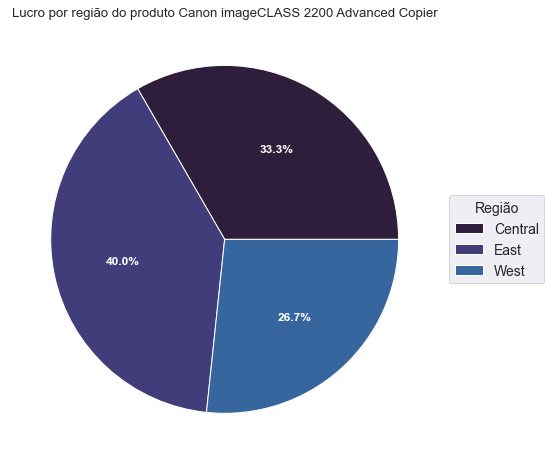

In [28]:
# Query
query = data[['region', 'profit', 'product_id']]
query = query[query['product_id']==best_seller_id]
query = query.groupby(['region']).sum().reset_index()

# Gráfico
plt.figure(figsize=(14, 8))
plt.title('Lucro por região do produto ' + best_seller)
plt.pie(x=query['profit'], autopct='%1.1f%%', textprops={'color':'white', 'weight':'bold', 'size':12})
plt.legend(labels=query['region'],
          title='Região',
          title_fontsize=14,
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1),
          prop={'size':14})

##### Diferença de lucro por estados

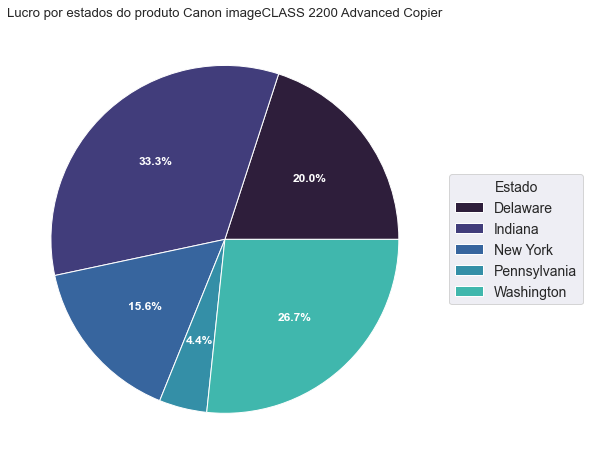

In [29]:
# Query
query = data[['state', 'profit', 'product_id']]
query = query[query['product_id']==best_seller_id]
query = query.groupby(['state']).sum().reset_index()

# Gráfico
plt.figure(figsize=(14, 8))
plt.title('Lucro por estados do produto ' + best_seller)
plt.pie(x=query['profit'], autopct='%1.1f%%', textprops={'color':'white', 'weight':'bold', 'size':12})
plt.legend(labels=query['state'],
          title='Estado',
          title_fontsize=14,
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1),
          prop={'size':14})

### Análise sobre o item que gerou mais prejuízo

In [30]:
# Quantidade de vendas por região
query = data[['region', 'product_id', 'sales', 'profit']]
query = query[query['product_id']==worst_seller_id]
query

,region,product_id,sales,profit
3151,East,TEC-MA-10000418,1799.994,-2639.9912
4218,West,TEC-MA-10000418,4799.984,359.9988
7772,East,TEC-MA-10000418,4499.985,-6599.9780


Houveram apenas três vendas do produto com mais prejuízo. A quantidade de vendas é bastante pequena e o prejuízo é muito grande, teve-se apenas uma venda com lucro, que foi baixo, então pode-se pensar na possibilidade de remover tal produto do catálogo.

### Análise sobre a categoria 'Furniture'

##### Diferença de lucro por região

<AxesSubplot:title={'center':"'Furniture' - Lucro de acordo com cada região"}, xlabel='region', ylabel='profit'>

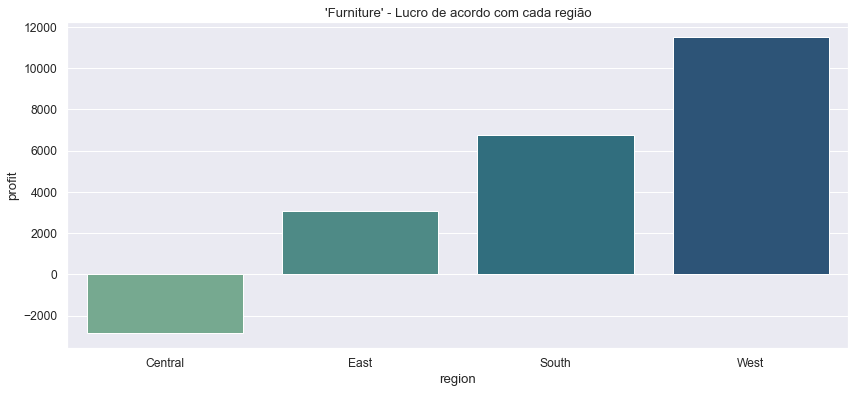

In [31]:
# Query
query = data[data['category'] == 'Furniture']
query = query.groupby(['region'])['profit'].sum()

# Gráfico
plt.figure(figsize=(14, 6))
plt.title("'Furniture' - Lucro de acordo com cada região")
sns.barplot(x=query.index, y=query, palette='crest')

A região 'Central' é a única que não obteve lucro com a categoria 'Furniture', seguida pela região 'East', que obteve pouco lucro e teve alguns pontos abordados mais à frente em relação a algumas sub-categorias dentro da categoria 'Furniture' que geram prejuízo.

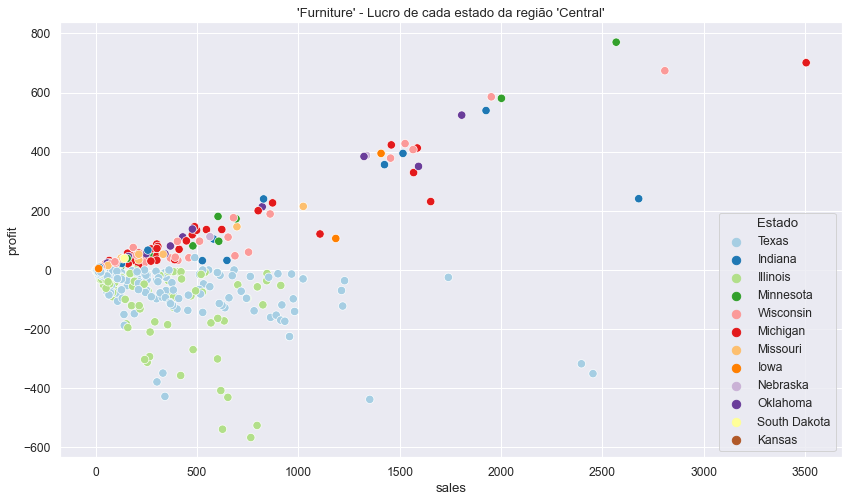

In [32]:
# Query
query = data[(data['category']=='Furniture') & (data['region']=='Central')]

# Gráfico
plt.figure(figsize=(14, 8))
plt.title("'Furniture' - Lucro de cada estado da região 'Central'")
sns.scatterplot(data=query, x='sales', y='profit', hue='state', size='state', sizes=(70,70), palette='Paired')
plt.legend(title='Estado')

No gráfico de dispersão acima, verificamos que há alguns estados da região 'Central' que majoritariamente dão prejuízo, vamos ver melhor quais são eles.

<AxesSubplot:title={'center':"'Furniture' - Lucro de cada estado da região 'Central'"}, xlabel='state', ylabel='profit'>

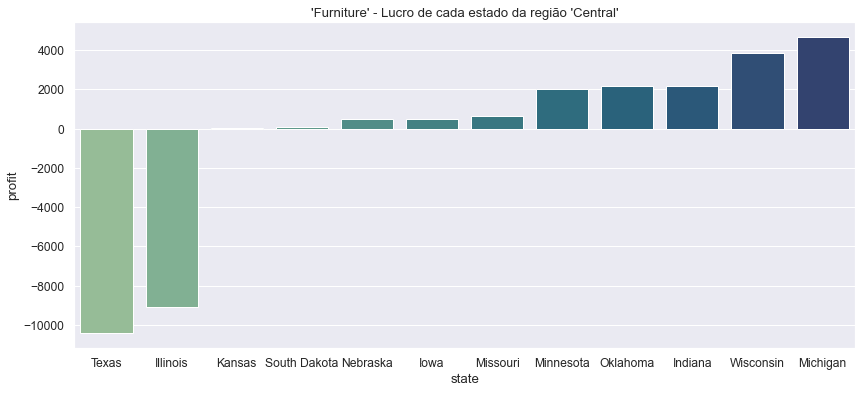

In [33]:
# Query
query = data[(data['category']=='Furniture') & (data['region']=='Central')]
query = query.groupby(['state'])['profit'].sum().sort_values()

# Gráfico
plt.figure(figsize=(14, 6))
plt.title("'Furniture' - Lucro de cada estado da região 'Central'")
sns.barplot(x=query.index, y=query, palette='crest')

Temos então que os estados 'Texas' e 'Illinois', que são da região 'Central', geram muito prejuízo em relação aos produtos da categoria 'Furniture'. Esse problema em questão é grave, uma vez que todo o prejuízo da região está concentrado nesses dois estados, que somado é maior que a soma do lucro dos outros estados. Esse tamanho de prejuízo faz com que a região fique com lucro total negativo.

### Análise relacionada às sub-categorias em geral

##### Lucro por sub-categoria

<AxesSubplot:title={'center':'Lucro por sub-categorias'}, xlabel='sub-category', ylabel='profit'>

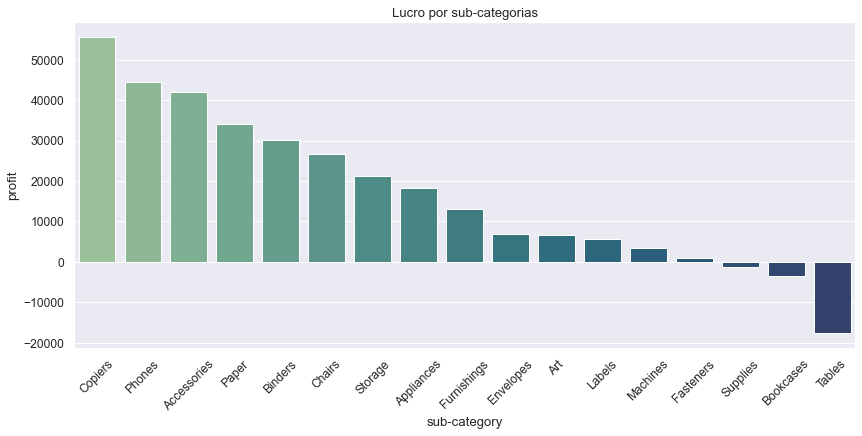

In [34]:
# Query
query = data[['sub-category', 'profit']]
query = query.groupby(['sub-category'])['profit'].sum().sort_values(ascending=False)

# Gráfico
plt.figure(figsize=(14, 6))
plt.xticks(rotation=45)
plt.title('Lucro por sub-categorias')
sns.barplot(x=query.index, y=query, palette='crest')

'Copiers', 'Phones' e 'Accessories' dão mais lucro. Além disso, percebe-se que 'Tables' gera muito prejuízo, que é seguido por 'Bookcases' e 'Supplies' que geram um prejuízo menor, e por 'Fasteners' que gera praticamente nenhum lucro.

### Analisando a sub-categoria 'Tables'

##### Verificando lucro por região

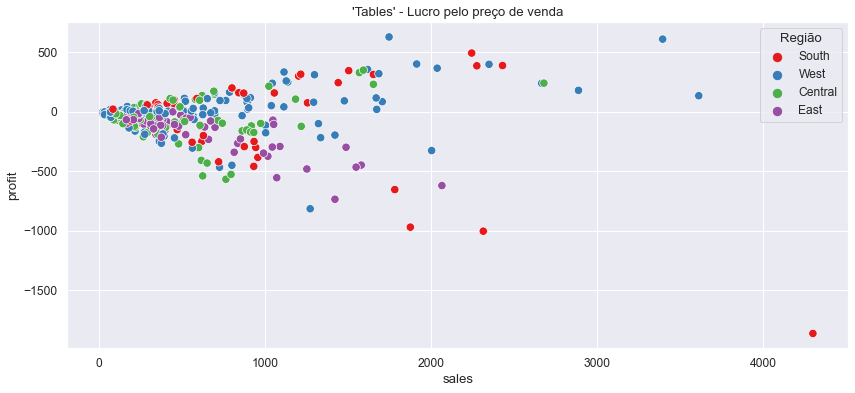

In [35]:
# Query
query = data[data['sub-category'] == 'Tables']

# Gráfico
plt.figure(figsize=(14, 6))
plt.title("'Tables' - Lucro pelo preço de venda")
sns.scatterplot(data=query, x='sales', y='profit', hue='region', size='region', sizes=(70,70), palette='Set1')
plt.legend(title='Região')

Em geral, essa sub-categoria ou gera pouco lucro ou gera prejuízo.Além disso, percebe-se que praticamente todas as vendas para a região 'East' dão prejuízo. Vamos fazer uma comparação.

[Text(0, 0.5, 'profit')]

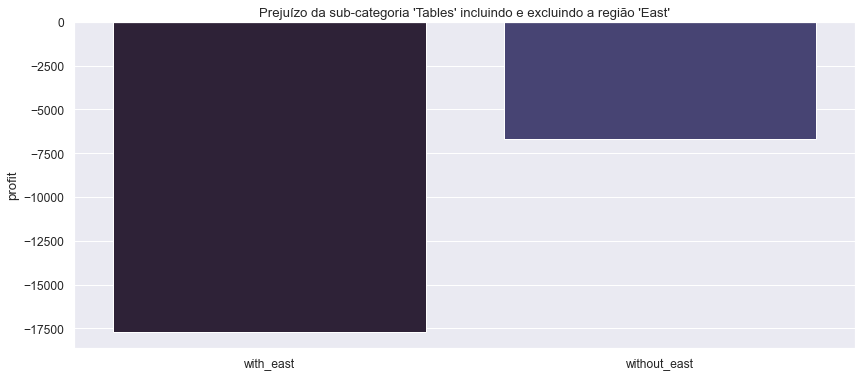

In [36]:
# Query
query = pd.DataFrame([[query['profit'].sum(), query[query['region']!='East']['profit'].sum()]],
                          columns=['with_east', 'without_east'])

# Gráfico
plt.figure(figsize=(14, 6))
plt.title("Prejuízo da sub-categoria 'Tables' incluindo e excluindo a região 'East'")
sns.barplot(data=query).set(ylabel='profit')

Conseguimos ver que a sub-categoria na região 'East' realmente dá um prejuízo muito grande, então é importante evitar fazer vendas de 'Tables' nessa região ou adotar estratégias diferentes. Vale ressaltar que mesmo evitando a região citada, ao final o lucro ainda é negativo, como vemos no gráfico.

<AxesSubplot:title={'center':"'Tables' - Lucro por região"}, xlabel='region', ylabel='profit'>

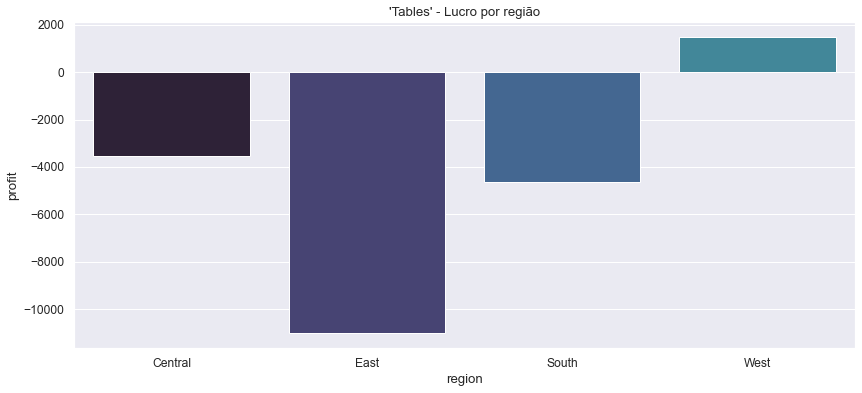

In [37]:
# Query
query = data[(data['sub-category'] == 'Tables')]
query = query.groupby('region').sum()['profit']

# Gráfico
plt.figure(figsize=(14, 6))
plt.title("'Tables' - Lucro por região")
sns.barplot(x=query.index, y=query)

Somente a região 'West' gera lucro com a sub-categoria 'Tables', então é um cenário que não pode ser ignorado.

### Analisando a sub-categoria 'Bookcases''

##### Verificando lucro por região

<AxesSubplot:title={'center':"'Bookcases' - Lucro por região"}, xlabel='region', ylabel='profit'>

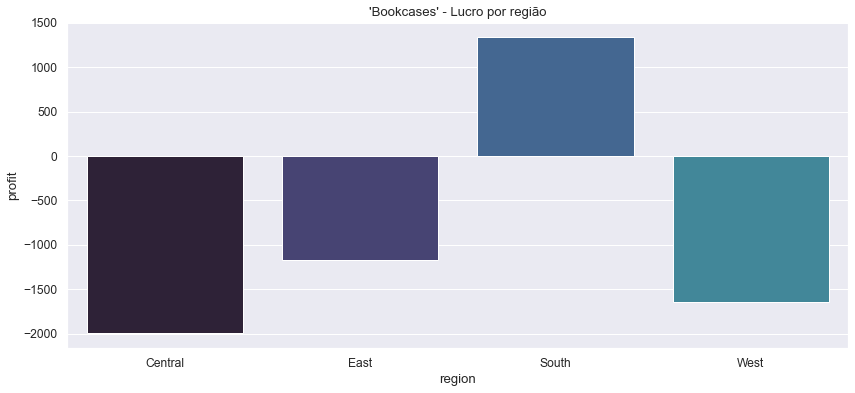

In [38]:
# Query
query = data[data['sub-category'] == 'Bookcases']
query = query.groupby(['region']).sum()['profit']

# Gráfico
plt.figure(figsize=(14, 6))
plt.title("'Bookcases' - Lucro por região")
sns.barplot(x=query.index, y=query)

Temos um cenário um pouco parecido com o da sub-categoria 'Tables', onde somente uma região gera lucro, então novamente é uma situação que não pode ser ignorada.

### Analisando a sub-categoria 'Copiers'

##### Verificando lucro por região

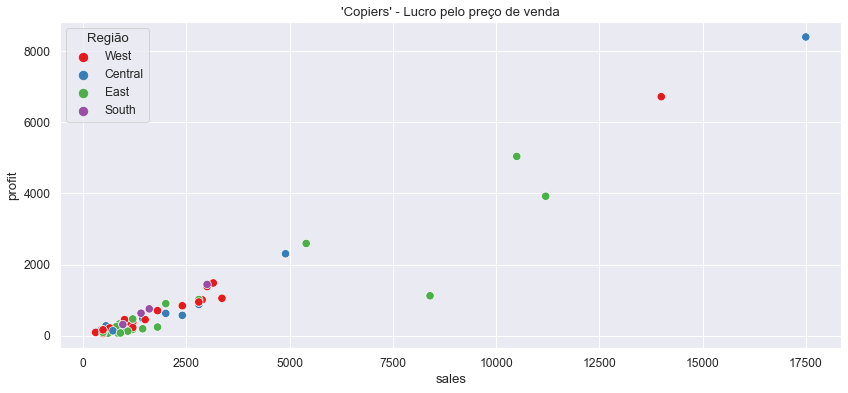

In [39]:
# Query
query = data[data['sub-category'] == 'Copiers']

# Gráfico
plt.figure(figsize=(14, 6))
plt.title("'Copiers' - Lucro pelo preço de venda")
sns.scatterplot(data=query, x='sales', y='profit', hue='region', size='region', sizes=(70,70), palette='Set1')
plt.legend(title='Região')

##### Quantidade de vendas com prejuízos

In [40]:
query = data[(data['sub-category'] == 'Copiers') & (data['profit'] < 0.0)]
len(query)

0

'Copiers' aparentemente não é uma sub-categoria que possui algum problema, além de gerar bastante lucro, não gera prejuízos.

### Analisando a sub-categoria 'Phones'

##### Verificando lucro por região

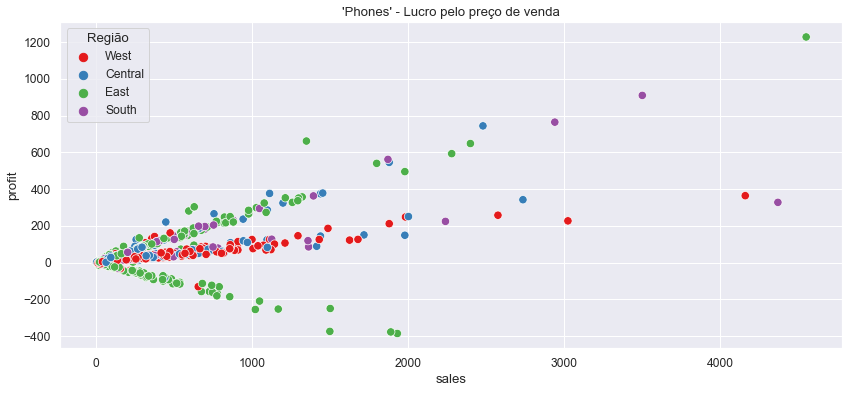

In [41]:
# Query
query = data[data['sub-category'] == 'Phones']

# Gráfico
plt.figure(figsize=(14, 6))
plt.title("'Phones' - Lucro pelo preço de venda")
sns.scatterplot(data=query, x='sales', y='profit', hue='region', size='region', sizes=(70,70), palette='Set1')
plt.legend(title='Região')

Através do gráfico acima, vemos que a venda de 'Phones' dá prejuízo de forma majoritária na região 'East', porém é uma região que gera bastante lucro também, então talvez seja necessário adotar medidas estratégicas diferentes nessa região, com o intuito de diminuir os prejuízos e não parar com as vendas do produto.

## Além do que foi explorado
___

Este projeto de exploração de dados e extração de insights foi feito focado principalmente nos dados sobre regiões, produtos, categorias e sub-categorias, em relação ao lucro das vendas realizadas. Há muito ainda para ser explorado, muitas informações podem ser extraídas dos dados que foram o foco do projeto e também dos dados que não tiveram tanto foco assim, como por exemplo aqueles referentes às colunas 'Ship Mode', 'Segments', 'City', entre outros.  
Além disso, pode-se utilizar fórmulas estatísticas para entender melhor o conjunto dos dados e como eles estão distribuídos, e até criar modelos de predição focados em prever o lucro/prejuízo dos produtos.